In [1]:
from qiskit import QuantumCircuit,QuantumRegister
from qiskit.extensions import UnitaryGate
import numpy as np
from math import pi,sin,cos,sqrt
from qiskit import Aer,transpile, Aer, execute,assemble
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.quantum_info.operators import Operator
import matplotlib.pyplot as plt


In [ ]:
from qiskit.quantum_info.operators import Operator
import matplotlib.pyplot as plt
qc = QuantumCircuit()                     #creating a quantum circuit for the set-up
qr = QuantumRegister(2,'player')          # registering two qubits, one for each player
qc.add_register( qr )                     #adding qubits to the circuit
qc.draw()
stratA="Q"
stratB="C"
gamma=
# creating the Qnitary J and J dagger operators #

qc = QuantumCircuit(2)       
scoreAc=0
m1 = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
m1 = np.multiply(m1, np.cos(gamma/2))
m2 = [[0, 0, 0, 1], [0, 0, -1, 0], [0, -1, 0, 0], [1, 0, 0, 0]]
m2 = np.multiply(m2, 1j * np.sin(gamma/2 ))
m3 = m1 + m2
m4 = m1 - m2

J = Operator(m3)

Jdag = Operator(m4)

    #strategy matrices
cooperate = [[1,0],[0,1]]
defect = [[0,1],[-1,0]]
quantum = [[1j/(sqrt(2)), -1/(sqrt(2))],[1/(sqrt(2)), -1j/(sqrt(2))]]
    # quantum = [[sqrt(2)*0.5*1j,sqrt(2)*0.5],[-1*sqrt(2)*0.5,sqrt(2)*0.5*-1j]]
    # quantum = [[sqrt(2)*0.5 + sqrt(2)*0.5*1j, 0],[0, sqrt(2)*0.5 - sqrt(2)*0.5*1j]]
    # quantum = [[1j/(sqrt(2)), -1/(sqrt(2))],[1/(sqrt(2)), -1j/(sqrt(2))]]

    #interphasing matrices with player's strategies
if stratA == "C" :
    mA = cooperate
elif stratA == "D" :
    mA = defect
elif stratA == "Q" :
    mA = quantum
else :
    print("error, not a strategy")

if stratB == "C" :
    mB = cooperate
elif stratB == "D" :
    mB = defect
elif stratB == "Q" :
    mB = quantum
else :
    print("error, not a strategy")

    #tensor product of the strategies for generating new state vector
mAB = np.tensordot(mA, mB, axes=0)
mAB = mAB.transpose((0, 2, 1, 3)).reshape(4, 4)
UAB = Operator(mAB)
    # applying all the parameters to the circuit
qc.append(J, [0, 1])
qc.append(UAB, [0, 1])
qc.append(Jdag, [0, 1])
qc.draw()

    #simulating the players' playoff
sv_sim = Aer.get_backend('aer_simulator')
qc.save_statevector()
qobj = assemble(qc)
job = sv_sim.run(qobj)
ket = job.result().get_statevector()

    #classical rewards
coeffsA = [3, 0, 5, 1]  ##CC, CD, DC, DD
coeffsB = [3, 5, 0, 1]  ##CC, DC, CD, DD
scoreB = 0

    #Quantum Advantage
for x in range(len(ket)) :
    amplitude = ket[x]
    scoreAc += round(abs(amplitude)**2 * coeffsA[x], 2) 
    scoreB += round(abs(amplitude)**2 * coeffsB[x], 2) 
print(scoreB)

C:\Users\adish\AppData\Local\Temp\ipykernel_24748\2335982361.py:65: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = sv_sim.run(qobj)
C:\Users\adish\AppData\Local\Temp\ipykernel_24748\2335982361.py:74: DeprecationWarning: The return type of saved statevectors has been changed from a `numpy.ndarray` to a `qiskit.quantum_info.Statevector` as of qiskit-aer 0.10. Accessing numpy array attributes is deprecated and will result in an error in a future release. To continue using saved result objects as arrays you can explicitly cast them using  `np.asarray(object)`.
  for x in range(len(ket)) :


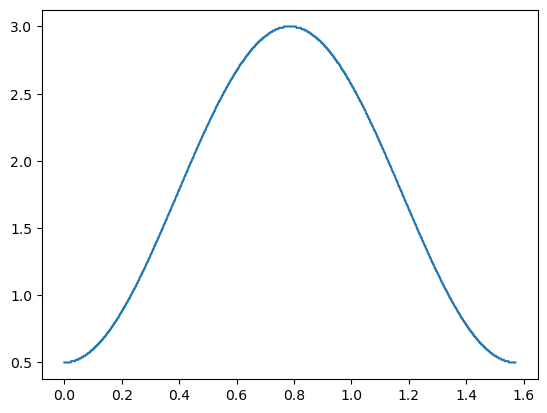

In [11]:
qc = QuantumCircuit()                     #creating a quantum circuit for the set-up
qr = QuantumRegister(2,'player')          # registering two qubits, one for each player
qc.add_register( qr )                     #adding qubits to the circuit
qc.draw()
stratA="Q"
stratB="D"
gamma=np.linspace(0,pi/2,1000)
scoreA=np.zeros(1000)
# creating the Qnitary J and J dagger operators #
for i in range(1000):
    qc = QuantumCircuit(2)       
    scoreAc=0
    m1 = [[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]]
    m1 = np.multiply(m1, np.cos(gamma[i]))
    m2 = [[0, 0, 0, 1], [0, 0, -1, 0], [0, -1, 0, 0], [1, 0, 0, 0]]
    m2 = np.multiply(m2, 1j * np.sin(gamma[i] ))
    m3 = m1 + m2
    m4 = m1 - m2

    J = Operator(m3)

    Jdag = Operator(m4)

        #strategy matrices
    cooperate = [[1,0],[0,1]]
    defect = [[0,1],[-1,0]]
    quantum = [1j/(sqrt(2)), -1/(sqrt(2))],[1/(sqrt(2)), -1j/(sqrt(2))]
        # quantum = [[sqrt(2)*0.5*1j,sqrt(2)*0.5],[-1*sqrt(2)*0.5,sqrt(2)*0.5*-1j]]
        # quantum = [[sqrt(2)*0.5 + sqrt(2)*0.5*1j, 0],[0, sqrt(2)*0.5 - sqrt(2)*0.5*1j]]
        # quantum = [[1j/(sqrt(2)), -1/(sqrt(2))],[1/(sqrt(2)), -1j/(sqrt(2))]]

        #interphasing matrices with player's strategies
    if stratA == "C" :
        mA = cooperate
    elif stratA == "D" :
        mA = defect
    elif stratA == "Q" :
        mA = quantum
    else :
        print("error, not a strategy")

    if stratB == "C" :
        mB = cooperate
    elif stratB == "D" :
        mB = defect
    elif stratB == "Q" :
        mB = quantum
    else :
        print("error, not a strategy")

        #tensor product of the strategies for generating new state vector
    mAB = np.tensordot(mA, mB, axes=0)
    mAB = mAB.transpose((0, 2, 1, 3)).reshape(4, 4)
    UAB = Operator(mAB)
        # applying all the parameters to the circuit
    qc.append(J, [0, 1])
    qc.append(UAB, [0, 1])
    qc.append(Jdag, [0, 1])
    qc.draw()

        #simulating the players' playoff
    sv_sim = Aer.get_backend('aer_simulator')
    qc.save_statevector()
    qobj = assemble(qc)
    job = sv_sim.run(qobj)
    ket = job.result().get_statevector()

        #classical rewards
    coeffsA = [3, 0, 5, 1]  ##CC, CD, DC, DD
    coeffsB = [3, 5, 0, 1]  ##CC, DC, CD, DD
    scoreB = 0

        #Quantum Advantage
    for x in range(len(ket)) :
        amplitude = ket[x]
        scoreAc += round(abs(amplitude)**2 * coeffsA[x], 2) 
        scoreB += round(abs(amplitude)**2 * coeffsB[x], 2) 
    scoreA[i]=scoreAc
plt.plot(gamma,scoreA)
plt.show()